In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [5]:
url = "../HW assignments/HW2/admissions.csv"
AdmissionData = pd.read_csv(url)
print(AdmissionData.head(5))
# Let's get rid of Missing values - there are only a few missing values so, let's drop them all
AdmissionData.dropna(inplace = True)
AdmissionData.describe() # Only 3 rows are dropped

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [6]:
PrestigeDummy = pd.get_dummies(AdmissionData.prestige, prefix = 'prestige')
del PrestigeDummy['prestige_4.0'] 
AdmissionData = pd.concat([AdmissionData, PrestigeDummy], axis=1)
AdmissionData.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0
0,0,380,3.61,3,0,0,1
1,1,660,3.67,3,0,0,1
2,1,800,4.00,1,1,0,0
3,1,640,3.19,4,0,0,0
4,0,520,2.93,4,0,0,0


In [7]:
lm = LogisticRegression()
y = AdmissionData['admit']
X = AdmissionData[['gre','gpa','prestige_1.0','prestige_2.0','prestige_3.0']]

In [8]:
lm.fit(X,y)
print lm.coef_
print lm.intercept_


[[  1.58889206e-03   1.84630743e-04   1.16761197e+00   5.26947989e-01
   -3.80822678e-02]]
[-2.07018745]


What do we learn from these coefficients (assume they are all significant)?

Higher GPA and higher GRE adds to odds of admission. The same story is true for prestige. The higher the prestige of your undergraduate school the more your chance of getting admitted. We are going to interpret the coefficients in more detail later.
 

#### In comparison to the person who is graduated from a tier 4 school (i.e. prestige = 4), what are the odds of a person who has graduated from a top level school to get admitted to UCLA?

In [9]:
import numpy as np
print(np.exp(1.16761197)  - 1)
#Her odds of admission is 221% more than a person who is graduated from a 
#tier 4 school

2.21430760315


#### Student A and Student B are graduated from same school, have same background and same GPA. The only difference between the two is their GRE score. Student A's GPA is 50 scores better. What is the difference of odds of admission for these two students?

In [11]:
print(np.exp(50*0.0015889 ) - 1)
#Student A have 8.26% better odds than student B

0.0826860101613


#### What is the probability of a student who came from a second tier school to get admitted to UCLA if her GPA is 3.5, GRE Score is 650.

In [12]:
x1 = [[650,3.5,0,1,0]]
print(lm.predict(x1))  #It is more likely that she will not get admitted
print(lm.predict_proba(x1)) #Probability of Admission is only 37.5%
# Two numbers: Probability that she won't, probability that she will.
# [0,1]

[0]
[[ 0.62476273  0.37523727]]


#### Let's calculate cross-validation error

In [13]:
from sklearn.cross_validation import cross_val_score
print(cross_val_score(lm,X,y,cv=10)) # Doesn't work when you have more than one var
#cross_val_score(model,inputs,output,cv = k-fold).mean()
print(cross_val_score(lm,X,y,cv=10).mean())

[ 0.80487805  0.575       0.725       0.675       0.7         0.675
  0.69230769  0.64102564  0.71794872  0.66666667]
0.687282676673


In [14]:
from sklearn.metrics import confusion_matrix
y_hat = lm.predict(X)
confusion_matrix(y, y_hat)


array([[256,  15],
       [104,  22]])

#### Try testing and plotting CV Scores with different C values

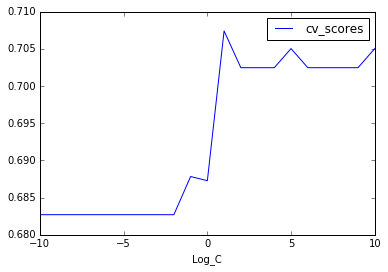

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# Try testing and plo
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score)
    cv_scores.append(cross_val_score(lm,X,y,cv=10).mean()) # Remove the prev loop
    # CV_score is crossval precision

C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' );
# our choice is C = 10 becajuse we get Log(1) = 10

In [23]:
C_Choice_df.Log_C[C_Choice_df.cv_scores.idxmax()]

1.0

In [18]:
lm = LogisticRegression(C = 10)
lm.fit(X,y)
print(lm.coef_)



[[ 0.00208211  0.63232997  1.46818044  0.79139463  0.15518283]]


#### IF YOU WAN TO MAKE COEFFICIENTS RELEVANT - YOU MUST STANDARDIZE YOUR DATA FIRST

In [ ]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

#Please try it yourself

